# Bibliotheques

In [ ]:
import keras
import pandas
from PIL import Image
from matplotlib.pyplot import imshow
from keras import utils as np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train,y_train) print(model)

# Pour Vectorisation et normalisation.

- Transformer les données en tenseurs > vectorisation des données

In [ ]:
# Normalisation avec 'from sklearn.preprocessing import MinMaxScaler'
# pour les données d'entrainement 

scaler = MinMaxScaler(feature_range=(0,1))
y_train_new = scaler.fit_transform(y_train.reshape(-1,1))

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Pour convertir des vecteurs de classe en matrices de classe binaires
Pour faire du codage catégorique¶

    

In [ ]:
# pour un codage par catégories

y_train = keras.utils.to_categorical(y_train, nombre_de_classes)
y_test = keras.utils.to_categorical(y_test, nombre_de_classes)

In [ ]:
# Pour codage par catégories

catego_y_train = keras.utils.to_categorical(y_train)


In [ ]:
# Pour l encodage des étiquettes
# Encodage des etiquettes afin qu'elles soit utilisable par le réseau de neurones

le = preprocessing.LabelEncoder()

# encodage de 4 chiffres  par exemple

y_train_new=le.fit_transform(y_train)
catego_y_train_new=tf.keras.utils.to_categorical(y_train_new,num_classes=4,dtype='float32')


In [ ]:
#  Exemple de normalisation de données.
# ******************************************************************

x_train_final = x_train_new.reshape(23849, 784)
x_test_final = x_test_new.reshape(3951, 784)
x_train_final = x_train_final.astype('float32')/255
x_test_final = x_test_final.astype('float32')/255

# *********************************************************************

# Exemple d'architecture de reseau

In [ ]:
# TYPE D ARCHITECTURE DE MODELE
# Prédiction étiquette unique > activation >softmax
# Classification binaire( 2 classes en sorties) > activation > sigmoid

# ******************************************************************

model = Sequential([
   Dense(1024, activation='relu', input_shape=(784,)),
   Dense(128, activation='tanh'),
   Dropout(rate=0.05),
   Dense(64, activation='relu'),
   Dense(10, activation='softmax') # une couche > sigmoid
])
# *******************************************************************

In [ ]:
#  Exemples ***********************************************

model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# *********************************************************

In [ ]:
# Exemples **************************************************************

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(nombre_de_classes, activation="softmax"),
    ]
)

model.summary()

# **************************************************************************

Exemples de configurateurs de modeles
- 

In [ ]:
# COMPILATEUR  DE MODELE
# IMPORTANT ENCODAGE DES ETIQUETTES , LABELS
# Fonction de perte > categorical_crossentropy > Etiquettes codage catégorique
# Fonction de perte > sparse_categorical_crossentropy > Etiquettes dans un tenseur d'entiers
# de nombres entiers

model.compile(
   optimizer='Adam',
   loss='categorical_crossentropy',
   metrics=['accuracy']
)

In [ ]:
# Exemple ****************************************************************

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# ***********************************************************************

# Pour l'entrainements

In [ ]:
# Exemples ********************************************************************

batch_size = 128
epochs = 15

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.1
         )

# ****************************************************************************

# Pour faire des évaluations

In [ ]:
# Exemples *********************************************************

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# ********************************************************************

# Pour faire des sauvegardes et chargement des modeles

In [ ]:
# Pour l' Enregistrement de modele dans un fichier .hdf5

model.save(r'./logisticRegressionKeras.hdf5')


In [ ]:
# Pour charger un modèle à l'aide de la fonction load_model ().

model = keras.models.load_model(r'./logisticRegressionKeras.hdf5')


# Pour faire des  évaluations

In [ ]:
# Pour faire une évaluation

evaluation = model.evaluate(x_test, y_test)

# Pour faire des prédictions

In [ ]:
# Pour faire des prédictions

predictions = model.predict(x_test,
                            batch_size=10,
                            verbose=0)  

In [ ]:
# Keras nous propose une autre méthode intéressante,
# qui peut être utilisée pour prédire les valeurs de nouvelles données 
# (données que le réseau n'a pas encore vues). 
# Comme nous n'avons pas séparé auparavant un tel ensemble,
# mais seulement divisé l'ensemble MNIST en données d'apprentissage et de test,
# nous n'utiliserons qu'un sous-ensemble des données de test.
# La méthode renverra un tableau de bord de 100 éléments.
# Chaque élément indiquera les probabilités que l'entrée appartienne à une classe donnée.


predictions = model.predict(x_test[0:100])

In [ ]:
#  por voir la prédiction pour x_test[0]
# la plupart des valeurs sont de très petits nombres 
# (très faible probabilité que l'image appartienne à cette classe)
# à l'exception du nombre en position 7 (compté à partir de 0).

predictions[0]

In [ ]:
# Numpy a une fonction très utile qui nous dira immédiatement quelle classe 
# a été évaluée par le modèle comme la plus probable. 

np.argmax(predictions[0])

In [ ]:
# Vérifions à quoi ressemble l'image. 
# Rappelez-vous que les données d'entrée du réseau ont été aplaties 
# dans le but de creer un vecteur d'une longueur de 784.
# Avant de l'afficher, nous devons le reconvertir à la taille de 28 x 28 pixels. 

plt.imshow(x_test[0].reshape(28,28))

# Pour avoir des probabilités avec des 0 et des 1

In [ ]:
# Pour avoir des probabilités avec des 0 et des 1

predictions = (model.predict(x_test) > 0.5).astype(int)


In [ ]:
# Numpy a une fonction très utile qui nous dira immédiatement quelle classe 
# a été évaluée par le modèle comme la plus probable. 

np.argmax(predictions[0])


In [ ]:
# Pour vérifions à quoi ressemble l'image. 
# Rappelez-vous que les données d'entrée du réseau ont été aplaties 
# dans le but de creer un vecteur d'une longueur de 784.
# Avant de l'afficher, nous devons le reconvertir à la taille de 28 x 28 pixels. 

plt.imshow(x_test[0].reshape(28,28))

In [ ]:
# nous avons un tableau à deux dimensions, 
# et non à un vecteur comme avec l'utilisation précédente de argmax,
# nous devons indiquer à la fonction dans quelle dimension elle doit analyser 
# les données.
# Dans notre cas, le long de l'axe y, c'est-à-dire axis = 1. 

np.argmax(predictions, axis=1)

In [ ]:
# pour comparer la prediction.....

y_test[0:100]

In [ ]:
# une autre maniere de comparer les pedictions avec la realite.......

np.argmax(predictions, axis=1) == y_test[0:100]

In [ ]:
# pour calculer la precision.......

np.mean(np.argmax(predictions, axis=1) == y_test[0:100])

In [ ]:
# pour verifier ou il y a des erreurs.....si elle existe !

fausse_prediction = np.argmin(np.argmax(predictions, axis=1) == y_test[0:100])
fausse_prediction

In [ ]:
element = fausse_prediction
plt.imshow(x_test[element].reshape(28,28))
plt.show()
print("Label de l image classée", element,":", y_test[element])
print("Prediction pour cette image:", np.argmax(predictions[element]))

In [ ]:
# Une autre maniere de comparer les pedictions avec la realite.......
#  Dans notre cas, le long de l'axe y, c'est-à-dire axis = 1.

np.argmax(predictions, axis=1) == y_test[0:100]

In [ ]:
# Pour calculer la precision.......

np.mean(np.argmax(predictions, axis=1) == y_test[0:100])

In [ ]:
# Pour verifier ou il y a des erreurs.....si elle existe !

fausse_prediction = np.argmin(np.argmax(predictions, axis=1) == y_test[0:100])
fausse_prediction

In [ ]:
# Pour l image et la fausse prédiction

element = fausse_prediction
plt.imshow(x_test[element].reshape(28,28))
plt.show()
print("Label de l image classée", element,":", y_test[element])
print("Prediction pour cette image:", np.argmax(predictions[element]))

In [ ]:
# Classificationen 2 classes > classification binaire


# Pour évaluer un modèle à l'aide d'une matrice de confusion 

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

-Ici, vous pouvez voir la matrice de confusion sous la forme d'un objet tableau. La dimension de cette matrice est 2*2 car ce modèle est une classification binaire. Vous disposez de deux classes 0 et 1. Les valeurs diagonales représentent des prédictions précises, tandis que les éléments non diagonaux sont des prédictions inexactes. Dans le résultat, 115 et 39 sont des prédictions réelles, et 30 et 8 sont des prédictions incorrectes. 

In [ ]:
array([[115,   8],
      [ 30,  39]])

# Pour visualiser la matrice de confusion à l'aide de Heatmap

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label');

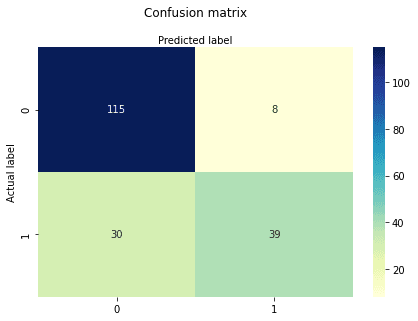